In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers  #모듈(변수나 함수를 포함)만 불러오기

csv = pd.read_csv("iris.csv")

X = csv[["sepal_length", "sepal_width","petal_length","petal_width"]].as_matrix()

print(X[0])
# 레이블
bclass = {"Iris-virginica":[1,0,0], "Iris-setosa":[0,1,0], "Iris-versicolor":[0,0,1]}
y = np.empty((150,3))     # 2000x3 크기의 다차원 벡터 생성

for i, v in enumerate(csv["iris_type"]): #i는 index(숫자), v는 label의 원자값(문자열)들어감
    y[i] = bclass[v]                 #"thin'이면, y[i]=[1,0,0] 와 같이 할당


# 훈련 전용 데이터와 테스트 전용 데이터로 나누기 --- (※2)
X_train, y_train = X[0:100], y[0:100]
X_test,  y_test  = X[100:150], y[100:150]
print(type(X_train))
print(type(y_train))


[6.4 3.1 5.5 1.8]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


C:\anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [2]:
#순차적 계층화 준비
model = tf.keras.Sequential()  

# -------------------input node:4, hidden node:15---------------------------
model.add(layers.Dense(15, input_shape=(4,)))  
model.add(layers.Activation('relu'))  
model.add(layers.Dropout(0.1))        

# ------------------------hidden node : 15-------------------------------------
model.add(layers.Dense(15))       
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.1))

#-------------------------output node : 3-------------------------------------
model.add(layers.Dense(3))
model.add(layers.Activation('softmax')) 

# 모델 구축하기
model.compile(
    loss='categorical_crossentropy',  #다중 교차엔트로피
    optimizer="rmsprop",   #최적화 기법 중 하나
    metrics=['accuracy'])  #정확도 측정


In [3]:
#데이터 훈련
'''
batch_size       : 몇번마다 수정할 것인가.
epochs           : 최대 몇번 반복할 것인가(early stopping에 걸릴 수 있음)
valdiation_split : 데이터가 잘 학습되었는지 확인 (training set에서 몇프로 만큼?)
callbacks        : moniotr(val_loss혹은 val_accuracy) 가 patience만큼 개선되지 않으면 종료
verbose          : 0:미출력, 1:개선되는과정 출력, 2:매 에포크마다 출력
'''
hist = model.fit(
    X_train, y_train,
    batch_size=30,  
    epochs=300,    
    validation_split=0.2,  
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=500)],  
    verbose=1) 

# 테스트 데이터로 평가하기 
score = model.evaluate(X_test, y_test)
print('test_loss: ', score[0])
print('test_acc: ', score[1])

Train on 80 samples, validate on 20 samples
Epoch 1/300
80/80 [==============================] - 1s 15ms/sample - loss: 2.1466 - accuracy: 0.2875 - val_loss: 2.0132 - val_accuracy: 0.3000
Epoch 2/300
80/80 [==============================] - 0s 213us/sample - loss: 1.8366 - accuracy: 0.3250 - val_loss: 1.8369 - val_accuracy: 0.3000
Epoch 3/300
80/80 [==============================] - 0s 263us/sample - loss: 1.6322 - accuracy: 0.3000 - val_loss: 1.7261 - val_accuracy: 0.3000
Epoch 4/300
80/80 [==============================] - 0s 275us/sample - loss: 1.5412 - accuracy: 0.2750 - val_loss: 1.6409 - val_accuracy: 0.3000
Epoch 5/300
80/80 [==============================] - 0s 238us/sample - loss: 1.4664 - accuracy: 0.3000 - val_loss: 1.5652 - val_accuracy: 0.3000
Epoch 6/300
80/80 [==============================] - 0s 263us/sample - loss: 1.4153 - accuracy: 0.3125 - val_loss: 1.5049 - val_accuracy: 0.3000
Epoch 7/300
80/80 [==============================] - 0s 288us/sample - loss: 1.4212 - a

Epoch 57/300
80/80 [==============================] - 0s 325us/sample - loss: 0.7545 - accuracy: 0.5875 - val_loss: 0.5942 - val_accuracy: 0.7500
Epoch 58/300
80/80 [==============================] - 0s 300us/sample - loss: 0.6951 - accuracy: 0.6875 - val_loss: 0.5906 - val_accuracy: 0.7000
Epoch 59/300
80/80 [==============================] - 0s 288us/sample - loss: 0.7175 - accuracy: 0.6375 - val_loss: 0.5801 - val_accuracy: 0.7000
Epoch 60/300
80/80 [==============================] - 0s 263us/sample - loss: 0.6844 - accuracy: 0.7000 - val_loss: 0.5636 - val_accuracy: 0.9000
Epoch 61/300
80/80 [==============================] - 0s 288us/sample - loss: 0.6489 - accuracy: 0.7250 - val_loss: 0.5580 - val_accuracy: 0.9000
Epoch 62/300
80/80 [==============================] - 0s 275us/sample - loss: 0.6997 - accuracy: 0.6750 - val_loss: 0.5505 - val_accuracy: 0.8500
Epoch 63/300
80/80 [==============================] - 0s 288us/sample - loss: 0.6653 - accuracy: 0.7000 - val_loss: 0.5427 -

Epoch 113/300
80/80 [==============================] - 0s 263us/sample - loss: 0.4630 - accuracy: 0.8000 - val_loss: 0.3057 - val_accuracy: 1.0000
Epoch 114/300
80/80 [==============================] - 0s 263us/sample - loss: 0.4406 - accuracy: 0.8250 - val_loss: 0.3027 - val_accuracy: 1.0000
Epoch 115/300
80/80 [==============================] - 0s 250us/sample - loss: 0.4184 - accuracy: 0.8875 - val_loss: 0.2998 - val_accuracy: 1.0000
Epoch 116/300
80/80 [==============================] - 0s 263us/sample - loss: 0.4642 - accuracy: 0.7750 - val_loss: 0.2985 - val_accuracy: 0.9500
Epoch 117/300
80/80 [==============================] - 0s 263us/sample - loss: 0.4291 - accuracy: 0.8500 - val_loss: 0.2938 - val_accuracy: 1.0000
Epoch 118/300
80/80 [==============================] - 0s 250us/sample - loss: 0.4247 - accuracy: 0.8000 - val_loss: 0.2905 - val_accuracy: 1.0000
Epoch 119/300
80/80 [==============================] - 0s 263us/sample - loss: 0.4276 - accuracy: 0.8250 - val_loss: 0

80/80 [==============================] - 0s 350us/sample - loss: 0.2969 - accuracy: 0.8875 - val_loss: 0.1770 - val_accuracy: 1.0000
Epoch 169/300
80/80 [==============================] - 0s 250us/sample - loss: 0.3184 - accuracy: 0.8750 - val_loss: 0.1826 - val_accuracy: 0.9500
Epoch 170/300
80/80 [==============================] - 0s 350us/sample - loss: 0.2946 - accuracy: 0.9375 - val_loss: 0.1684 - val_accuracy: 1.0000
Epoch 171/300
80/80 [==============================] - 0s 313us/sample - loss: 0.3687 - accuracy: 0.8375 - val_loss: 0.1641 - val_accuracy: 1.0000
Epoch 172/300
80/80 [==============================] - 0s 300us/sample - loss: 0.3411 - accuracy: 0.8625 - val_loss: 0.1649 - val_accuracy: 1.0000
Epoch 173/300
80/80 [==============================] - 0s 300us/sample - loss: 0.2836 - accuracy: 0.8875 - val_loss: 0.1670 - val_accuracy: 1.0000
Epoch 174/300
80/80 [==============================] - 0s 325us/sample - loss: 0.2621 - accuracy: 0.9125 - val_loss: 0.1677 - val_ac

Epoch 224/300
80/80 [==============================] - 0s 350us/sample - loss: 0.2283 - accuracy: 0.9250 - val_loss: 0.0946 - val_accuracy: 1.0000
Epoch 225/300
80/80 [==============================] - 0s 375us/sample - loss: 0.2276 - accuracy: 0.9125 - val_loss: 0.0930 - val_accuracy: 1.0000
Epoch 226/300
80/80 [==============================] - 0s 325us/sample - loss: 0.2154 - accuracy: 0.9250 - val_loss: 0.0971 - val_accuracy: 1.0000
Epoch 227/300
80/80 [==============================] - 0s 400us/sample - loss: 0.2932 - accuracy: 0.8625 - val_loss: 0.0941 - val_accuracy: 1.0000
Epoch 228/300
80/80 [==============================] - 0s 350us/sample - loss: 0.1805 - accuracy: 0.9625 - val_loss: 0.0887 - val_accuracy: 1.0000
Epoch 229/300
80/80 [==============================] - 0s 338us/sample - loss: 0.2182 - accuracy: 0.9250 - val_loss: 0.0907 - val_accuracy: 1.0000
Epoch 230/300
80/80 [==============================] - 0s 300us/sample - loss: 0.2427 - accuracy: 0.9375 - val_loss: 0

80/80 [==============================] - 0s 263us/sample - loss: 0.1509 - accuracy: 0.9375 - val_loss: 0.0684 - val_accuracy: 1.0000
Epoch 280/300
80/80 [==============================] - 0s 275us/sample - loss: 0.1205 - accuracy: 0.9750 - val_loss: 0.0624 - val_accuracy: 1.0000
Epoch 281/300
80/80 [==============================] - 0s 313us/sample - loss: 0.1575 - accuracy: 0.9375 - val_loss: 0.0574 - val_accuracy: 1.0000
Epoch 282/300
80/80 [==============================] - 0s 263us/sample - loss: 0.1837 - accuracy: 0.9375 - val_loss: 0.0568 - val_accuracy: 1.0000
Epoch 283/300
80/80 [==============================] - 0s 288us/sample - loss: 0.1914 - accuracy: 0.9125 - val_loss: 0.0613 - val_accuracy: 1.0000
Epoch 284/300
80/80 [==============================] - 0s 263us/sample - loss: 0.1208 - accuracy: 1.0000 - val_loss: 0.0595 - val_accuracy: 1.0000
Epoch 285/300
80/80 [==============================] - 0s 288us/sample - loss: 0.1523 - accuracy: 0.9375 - val_loss: 0.0609 - val_ac

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                75        
_________________________________________________________________
activation (Activation)      (None, 15)                0         
_________________________________________________________________
dropout (Dropout)            (None, 15)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 15)                240       
_________________________________________________________________
activation_1 (Activation)    (None, 15)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 4

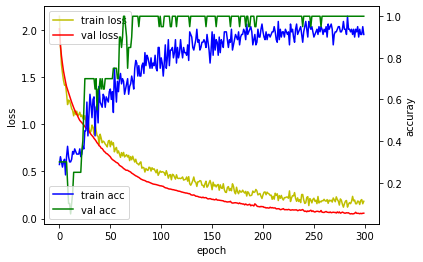

In [7]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()


acc_ax = loss_ax.twinx()


loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [6]:
# 인풋값이 다음과 같은 sample이 존재
sample=[[5.7, 3.8, 1.7, 0.3]]

# 각 클래스 레이블일 확률은?
y_pred_prob = model.predict_proba(sample)
print(y_pred_prob)

# 확률이 가장 높은 클래스는?
y_pred_class=model.predict_classes(sample)
print(y_pred_class)

[[1.25402035e-08 9.99392033e-01 6.07904687e-04]]
[1]
